# Welcome to Tutorial 2!


---

####  **This tutorial shall explore more on Disease models in [Episimmer](https://github.com/healthbadge/episimmer/tree/master).**



To begin with, let us perform some initialization.

In [1]:
!pip install episimmer --no-dependencies
!git clone https://github.com/healthbadge/episimmer.git
%cd episimmer
from google.colab.patches import cv2, cv2_imshow
from google.colab import _message

fatal: destination path 'episimmer' already exists and is not an empty directory.
/content/episimmer


In [2]:
# Some helper functions
def read_file(file_name):
  with open(file_name) as f:
    print(f.read())

def get_model_str(start_string):
  notebook_json_string = _message.blocking_request('get_ipynb', request='', timeout_sec=10)
  for cell in notebook_json_string['ipynb']['cells']:
    if cell['source'][0][:len(start_string)] == start_string:
      return ''.join(cell['source'])
  
  print("Could not find the cell with UserModel.py! Make sure the cell starts with the string you pass at the top of the cell.")


# Disease Model

---

### *To recap*


Disease models are used to model the spread of disease across agents in the environment. Agents are the disease carriers and all the different types of interactions present facilitate the spread of infection.

In Episimmer, There are two basic types of disease models -

1. *Stochastic Model* 

2. *Scheduled Model*

Both follow the [compartmental style of disease modelling](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) i.e. they have compartments or states that define the agent's disease state. They only differ by how they transition. Stochastic model allows us to implement compartmental models with probabilistic changes in state. Scheduled models have transitions that are scheduled based on a distribution. Scheduled models are more deterministic in spirit. For example in the real world an infected person might take on average 10 days with a variance of 2 days to recover.

Both of these models must be implemented by the user using the UserModel.py file

An example file is shown below (from example Stochastic_SIR) -

```python
import episimmer.model as model

#The two fucntions event_contribute_fn and event_recieve_fn together control the spread of infection

# This function states the amount an agent contributes to ambient infection in the region
#note that only infected agents contibute to the ambient infection
def event_contribute_fn(agent,event_info,location,current_time_step):
		if agent.state=='Infected':
			return 1
		return 0

#This fucntion states the probability of an agent becoming infected fromt he ambient infection
def event_recieve_fn(agent,ambient_infection,event_info,location,current_time_step):
	beta=0.001
	return ambient_infection*beta


class UserModel(model.StochasticModel):
	def __init__(self):
		individual_types=['Susceptible','Infected','Recovered']	#These are the states that will be used by the compartmental model
		infected_states=['Infected']	#These are the states that can infect
		state_proportion={				#This is the starting proportions of each state
							'Susceptible':0.99,
							'Infected':0.01,
							'Recovered':0
						}
		model.StochasticModel.__init__(self,individual_types,infected_states,state_proportion)  #We use the inbuilt model in the package
		self.set_transition('Susceptible', 'Infected', self.p_infection(None,None))	#Adding S-> I transition which is redundant in this case as we use the event_contribute and event_recieve function
		self.set_transition('Infected', 'Recovered', self.p_standard(0.2))	#Adding the I->R transition


		self.set_event_contribution_fn(event_contribute_fn)	#Setting the above defined fucntion into the model
		self.set_event_recieve_fn(event_recieve_fn)	#Setting the above defined fucntion into the model

		self.name='Stochastic SIR'
```

In [3]:
!cp -a examples/Basic_Disease_Models/Stochastic_SIR/. .
# read_file('UserModel.py')

### 1. Changing initial proportions of the compartmental states.

You can make changes to the initial proportions by changing the values in line 19-21. Just ensure that the proportions add up to 1. 

In [4]:
# Example 1
import episimmer.model as model

def event_contribute_fn(agent,event_info,location,current_time_step):
		if agent.state=='Infected':
			return 1
		return 0

def event_recieve_fn(agent,ambient_infection,event_info,location,current_time_step):
	beta=0.001
	return ambient_infection*beta


class UserModel(model.StochasticModel):
	def __init__(self):
		individual_types=['Susceptible','Infected','Recovered']
		infected_states=['Infected']
		state_proportion={
							'Susceptible':0.99,
							'Infected':0.01,
							'Recovered':0
						}
		# state_proportion={
		# 					'Susceptible':0.75,
		# 					'Infected':0.25,
		# 					'Recovered':0
		# 				}
		model.StochasticModel.__init__(self,individual_types,infected_states,state_proportion)
		self.set_transition('Susceptible', 'Infected', self.p_infection(None,None))
		self.set_transition('Infected', 'Recovered', self.p_standard(0.2))


		self.set_event_contribution_fn(event_contribute_fn)
		self.set_event_recieve_fn(event_recieve_fn)

		self.name='Stochastic SIR'


In [5]:
user_model_str = get_model_str("# Example 1")
with open("UserModel.py", "w") as f:
  f.write(user_model_str)

# read_file('UserModel.py')

No Interaction files uploaded!
No Probabilistic Interaction files uploaded!


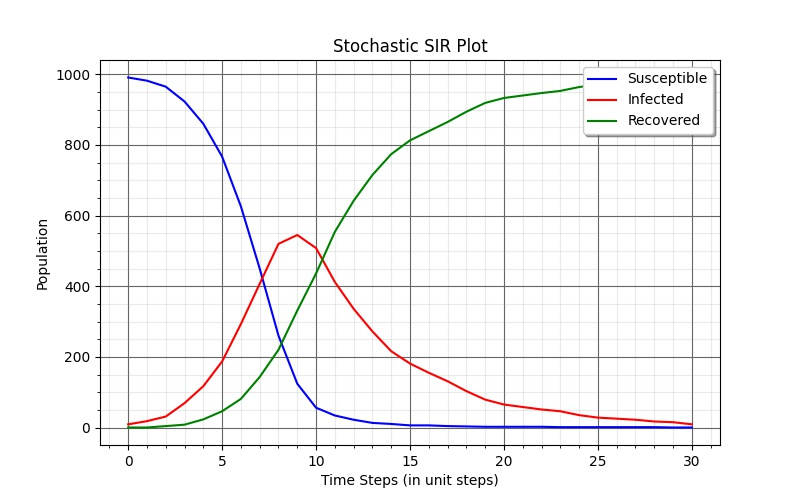

In [6]:
!python3 episimmer/main.py . -np
cv2_imshow(cv2.imread("results/results.jpg"))

### 2. Changing rate of recovery.

To change rate of recovery one will have to change the value at line 25 when defining the I->R transition. We use the inbuilt function p_standard to denote that this is a fixed rate (p_standard function is used when a particular state is independent of other states. For example, in a SIR stochastic model, I-> R is independent and hence the rate of transition is constant).

We increase the rate of recovery from 0.2 to 0.4. Try out both!

In [7]:
# Example 2
import episimmer.model as model

def event_contribute_fn(agent,event_info,location,current_time_step):
		if agent.state=='Infected':
			return 1
		return 0

def event_recieve_fn(agent,ambient_infection,event_info,location,current_time_step):
	beta=0.001
	return ambient_infection*beta


class UserModel(model.StochasticModel):
	def __init__(self):
		individual_types=['Susceptible','Infected','Recovered']
		infected_states=['Infected']
		state_proportion={
							'Susceptible':0.99,
							'Infected':0.01,
							'Recovered':0
						}
		model.StochasticModel.__init__(self,individual_types,infected_states,state_proportion)
		self.set_transition('Susceptible', 'Infected', self.p_infection(None,None))
		self.set_transition('Infected', 'Recovered', self.p_standard(0.2))
		# self.set_transition('Infected', 'Recovered', self.p_standard(0.4))


		self.set_event_contribution_fn(event_contribute_fn)
		self.set_event_recieve_fn(event_recieve_fn)

		self.name='Stochastic SIR'


In [8]:
user_model_str = get_model_str("# Example 2")
with open("UserModel.py", "w") as f:
  f.write(user_model_str)

# read_file('UserModel.py')

No Interaction files uploaded!
No Probabilistic Interaction files uploaded!


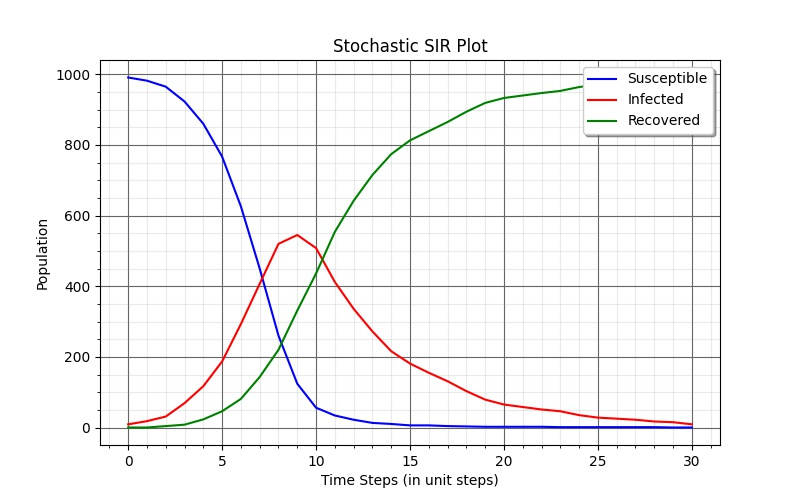

In [9]:
!python3 episimmer/main.py . -np
cv2_imshow(cv2.imread("results/results.jpg"))

Run the cells with both rate of recovery = 0.2 and 0.4. The peak significantly reduces in the latter case as agents recover faster. 

### 3. Changing rate of infection.

Recall that events model a complete graph of interactions between agents. For now, just know that Events model a complete graph of interactions in two stages :

i) Infected agents contribute to an ambient infection and then,

ii) Susceptible agents are affected by this ambient infection

We shall explain Events in more detail in a later tutorial.

Coming back to the problem of changing the rate of infection, for Events, there are two ways to change the rate of infection :
* Increasing each agents contribution to ambient infection 
* Increasing each agents receiving probability from ambient infection

This can be done by changing the values in event_contribute_fn and event_recieve_fn.  Considering the SIR model, event_contribute_fn checks every agent in an event and returns a particular value to the ambient_infection based on the agent's state (in this case Infected). event_recieve_fn calculates the probability at which an agent can get infected from the ambient_infection (In this case a chance of a susceptible agent becoming infected). 


In [10]:
# Example 3
import episimmer.model as model

def event_contribute_fn(agent,event_info,location,current_time_step):
		if agent.state=='Infected':
			return 1
			# return 2
		return 0

def event_recieve_fn(agent,ambient_infection,event_info,location,current_time_step):
	beta=0.001
	return ambient_infection*beta


class UserModel(model.StochasticModel):
	def __init__(self):
		individual_types=['Susceptible','Infected','Recovered']
		infected_states=['Infected']
		state_proportion={
							'Susceptible':0.99,
							'Infected':0.01,
							'Recovered':0
						}
		model.StochasticModel.__init__(self,individual_types,infected_states,state_proportion)
		self.set_transition('Susceptible', 'Infected', self.p_infection(None,None))
		self.set_transition('Infected', 'Recovered', self.p_standard(0.2))


		self.set_event_contribution_fn(event_contribute_fn)
		self.set_event_recieve_fn(event_recieve_fn)

		self.name='Stochastic SIR'


In [11]:
user_model_str = get_model_str("# Example 3")
with open("UserModel.py", "w") as f:
  f.write(user_model_str)

# read_file('UserModel.py')

No Interaction files uploaded!
No Probabilistic Interaction files uploaded!


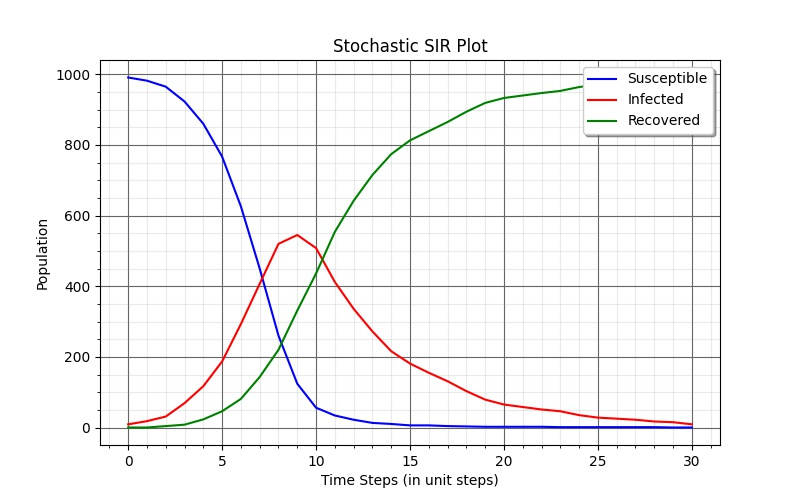

In [12]:
!python3 episimmer/main.py . -np
cv2_imshow(cv2.imread("results/results.jpg"))

### Disclaimer : These colab tutorials are only for reference and they are in no way representative of the entire functionality of Episimmer. Please look at the [Documentation](https://episimmer.readthedocs.io/en/latest/) for more details.